In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [3]:
#cargo primero los datos
file_dir = 'Datos/arg.txt'
data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
df = pd.DataFrame(data)
df = df.to_numpy()
df1 = np.copy(df) #el original
df = df[:-20] #saco los ultimos 20 dias (ult 10 para probar + ult 10 retrasados)
df1 = df1[:-10] #saco los ultimos 10 dias retrasados

In [4]:
#normalizacion
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df.reshape(-1,1))
df = df.reshape(-1,1)
#split en train y test
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] #train y test data
lag = 3 #creo que este es el que deducen en el paper
#creo los que vienen para la red
x_train, y_train = create_dataset(train_data, lag)
x_test, y_test = create_dataset(test_data, lag)

In [5]:
# reshape en (samples, time steps, features) para lstm como en pract7
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [15]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=100,activation='relu',return_sequences=True,input_shape=(lag,1),recurrent_dropout=0.2))
model.add(keras.layers.LSTM(units=100,activation='relu',recurrent_dropout=0.2))
model.add(keras.layers.Dense(units=1))
optimizer = keras.optimizers.Adam(1e-3)
model.compile(optimizer,loss=keras.losses.MeanAbsolutePercentageError(),metrics=['mse']) #metrics=['mean_absolute_percentage_error']
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=4,verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
Train on 234 samples, validate on 56 samples
Epoch 1/500
 - 1s - loss: 2273.0318 - mse: 0.0188 - val_loss: 87.1321 - val_mse: 0.4098
Epoch 2/500
 - 0s - loss: 1555.5028 - mse: 0.0079 - val_loss: 210.0541 - val_mse: 3.6841
Epoch 3/500
 - 0s - loss: 1957.5073 - mse: 0.0037 - val_loss: 52.6864 - val_mse: 0.2248
Epoch 4/500
 - 0s - loss: 2092.1122 - mse: 7.9210e-04 - val_loss: 15

 - 0s - loss: 1119.4219 - mse: 4.9264e-05 - val_loss: 10.7118 - val_mse: 0.0087
Epoch 82/500
 - 0s - loss: 1308.7657 - mse: 4.1385e-05 - val_loss: 4.1613 - val_mse: 0.0021
Epoch 83/500
 - 0s - loss: 964.4519 - mse: 4.3056e-05 - val_loss: 3.7145 - val_mse: 0.0018
Epoch 84/500
 - 0s - loss: 841.4462 - mse: 8.8868e-05 - val_loss: 2.2742 - val_mse: 7.3147e-04
Epoch 85/500
 - 0s - loss: 1340.9220 - mse: 9.0491e-05 - val_loss: 2.1284 - val_mse: 3.0874e-04
Epoch 86/500
 - 0s - loss: 2085.6910 - mse: 8.0086e-05 - val_loss: 6.6014 - val_mse: 0.0044
Epoch 87/500
 - 0s - loss: 1983.0369 - mse: 4.2749e-05 - val_loss: 2.6819 - val_mse: 3.6826e-04
Epoch 88/500
 - 0s - loss: 1251.5598 - mse: 5.0024e-05 - val_loss: 10.3140 - val_mse: 0.0090
Epoch 89/500
 - 0s - loss: 1208.4793 - mse: 6.8092e-05 - val_loss: 10.1709 - val_mse: 0.0085
Epoch 90/500
 - 0s - loss: 798.6184 - mse: 3.2969e-05 - val_loss: 2.8808 - val_mse: 0.0011
Epoch 91/500
 - 0s - loss: 1336.7612 - mse: 1.1342e-04 - val_loss: 1.5581 - val_m

Epoch 170/500
 - 0s - loss: 2033.6797 - mse: 6.3064e-05 - val_loss: 14.7459 - val_mse: 0.0249
Epoch 171/500
 - 0s - loss: 823.7124 - mse: 1.1000e-05 - val_loss: 12.0220 - val_mse: 0.0195
Epoch 172/500
 - 0s - loss: 470.8600 - mse: 8.6118e-05 - val_loss: 6.9966 - val_mse: 0.0036
Epoch 173/500
 - 0s - loss: 1433.5981 - mse: 3.3194e-05 - val_loss: 10.6178 - val_mse: 0.0161
Epoch 174/500
 - 0s - loss: 1352.9307 - mse: 6.5127e-05 - val_loss: 9.9641 - val_mse: 0.0142
Epoch 175/500
 - 0s - loss: 444.2110 - mse: 2.0753e-05 - val_loss: 19.8195 - val_mse: 0.0417
Epoch 176/500
 - 0s - loss: 756.0298 - mse: 2.8327e-05 - val_loss: 18.9831 - val_mse: 0.0385
Epoch 177/500
 - 0s - loss: 739.1460 - mse: 2.9366e-05 - val_loss: 13.4754 - val_mse: 0.0238
Epoch 178/500
 - 0s - loss: 1407.6920 - mse: 2.4611e-05 - val_loss: 9.7897 - val_mse: 0.0140
Epoch 179/500
 - 0s - loss: 479.5911 - mse: 2.0113e-05 - val_loss: 16.3976 - val_mse: 0.0315
Epoch 180/500
 - 0s - loss: 1175.4492 - mse: 2.6349e-05 - val_loss: 1

Epoch 258/500
 - 0s - loss: 1323.8747 - mse: 3.0677e-05 - val_loss: 13.5319 - val_mse: 0.0244
Epoch 259/500
 - 0s - loss: 1053.5297 - mse: 2.7366e-05 - val_loss: 12.0417 - val_mse: 0.0199
Epoch 260/500
 - 0s - loss: 1200.0694 - mse: 1.9569e-05 - val_loss: 18.3114 - val_mse: 0.0365
Epoch 261/500
 - 0s - loss: 2010.9730 - mse: 6.6844e-05 - val_loss: 31.4591 - val_mse: 0.0850
Epoch 262/500
 - 0s - loss: 1090.2914 - mse: 2.8604e-05 - val_loss: 22.8507 - val_mse: 0.0523
Epoch 263/500
 - 0s - loss: 1101.0544 - mse: 2.1099e-05 - val_loss: 16.4031 - val_mse: 0.0320
Epoch 264/500
 - 0s - loss: 1533.1097 - mse: 2.0651e-05 - val_loss: 19.2540 - val_mse: 0.0391
Epoch 265/500
 - 0s - loss: 726.5168 - mse: 3.8208e-05 - val_loss: 22.5875 - val_mse: 0.0502
Epoch 266/500
 - 0s - loss: 1178.6461 - mse: 6.8615e-05 - val_loss: 17.1309 - val_mse: 0.0343
Epoch 267/500
 - 0s - loss: 546.7704 - mse: 1.5459e-05 - val_loss: 17.0797 - val_mse: 0.0351
Epoch 268/500
 - 0s - loss: 1084.1063 - mse: 2.2584e-05 - val_

Epoch 346/500
 - 0s - loss: 778.1570 - mse: 2.3727e-05 - val_loss: 22.0350 - val_mse: 0.0476
Epoch 347/500
 - 0s - loss: 656.9838 - mse: 8.9602e-06 - val_loss: 17.3639 - val_mse: 0.0337
Epoch 348/500
 - 0s - loss: 673.1758 - mse: 1.7479e-05 - val_loss: 18.2210 - val_mse: 0.0365
Epoch 349/500
 - 0s - loss: 1001.9126 - mse: 1.5875e-05 - val_loss: 23.9417 - val_mse: 0.0538
Epoch 350/500
 - 0s - loss: 787.9971 - mse: 1.7078e-05 - val_loss: 19.5917 - val_mse: 0.0383
Epoch 351/500
 - 0s - loss: 1200.9671 - mse: 7.0147e-06 - val_loss: 25.6763 - val_mse: 0.0593
Epoch 352/500
 - 0s - loss: 726.3554 - mse: 2.5955e-05 - val_loss: 13.3462 - val_mse: 0.0225
Epoch 353/500
 - 0s - loss: 534.9873 - mse: 7.9526e-06 - val_loss: 21.5989 - val_mse: 0.0461
Epoch 354/500
 - 0s - loss: 565.3360 - mse: 1.6805e-05 - val_loss: 12.9197 - val_mse: 0.0219
Epoch 355/500
 - 0s - loss: 1481.3586 - mse: 2.5323e-05 - val_loss: 14.6452 - val_mse: 0.0261
Epoch 356/500
 - 0s - loss: 456.6190 - mse: 2.2638e-05 - val_loss: 

Epoch 434/500
 - 0s - loss: 930.1882 - mse: 1.2486e-05 - val_loss: 14.2902 - val_mse: 0.0210
Epoch 435/500
 - 0s - loss: 1235.5683 - mse: 8.1779e-06 - val_loss: 17.2111 - val_mse: 0.0274
Epoch 436/500
 - 0s - loss: 1766.7010 - mse: 3.0271e-05 - val_loss: 21.1933 - val_mse: 0.0378
Epoch 437/500
 - 0s - loss: 2800.2792 - mse: 5.7108e-05 - val_loss: 8.4511 - val_mse: 0.0091
Epoch 438/500
 - 0s - loss: 1157.1260 - mse: 1.6644e-05 - val_loss: 19.5614 - val_mse: 0.0327
Epoch 439/500
 - 0s - loss: 1114.5856 - mse: 7.3163e-06 - val_loss: 21.4211 - val_mse: 0.0382
Epoch 440/500
 - 0s - loss: 486.9326 - mse: 6.8702e-06 - val_loss: 17.7089 - val_mse: 0.0279
Epoch 441/500
 - 0s - loss: 1616.4023 - mse: 6.8764e-06 - val_loss: 21.9223 - val_mse: 0.0398
Epoch 442/500
 - 0s - loss: 1675.4739 - mse: 3.5963e-05 - val_loss: 8.4413 - val_mse: 0.0090
Epoch 443/500
 - 0s - loss: 1117.3705 - mse: 6.6722e-06 - val_loss: 19.6574 - val_mse: 0.0337
Epoch 444/500
 - 0s - loss: 1008.0194 - mse: 1.9584e-05 - val_lo

In [16]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [17]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [18]:
print('train mse squared:',np.sqrt(mean_squared_error(y_train,train_predict)))
print('test mse squared:',np.sqrt(mean_squared_error(y_test,test_predict))) 

train mse squared: 374744.78726702614
test mse squared: 2193702.449685239


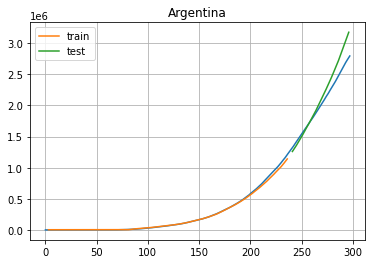

In [19]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(train_predict)+lag, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(lag*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.grid()
plt.title('Argentina')
plt.legend()
plt.show()

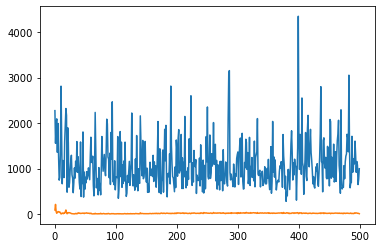

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# aca hacemos el forecast

In [21]:
n = len(test_data)
x_input=test_data[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<10): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, lag, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, lag,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[1.1993175]]
2 day output [[1.253029]]
3 day output [[1.476149]]
4 day output [[1.5589548]]
5 day output [[1.6901042]]
6 day output [[2.0568173]]
7 day output [[2.2591329]]
8 day output [[2.5836506]]
9 day output [[3.3880346]]


In [22]:
scaler.inverse_transform(lst_output)

array([[3258913.87859702],
       [3352154.4595561 ],
       [3502280.3979913 ],
       [4125909.87362134],
       [4357355.68080008],
       [4723923.66223407],
       [5748901.66391111],
       [6314381.97399187],
       [7221422.32589913],
       [9469708.56649375]])

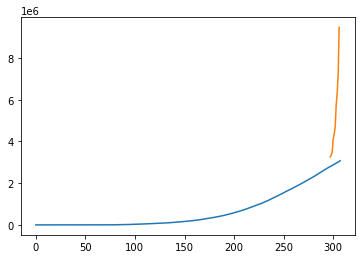

In [23]:
plt.plot(df1)
dias_forecast = np.arange(0,10) + len(df) - 1
plt.plot(dias_forecast,scaler.inverse_transform(lst_output))
#plt.xlim(290,310)